In [1]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Importando as bibliotecas do Scikit Learn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.base import clone

# Usando função mágica
%matplotlib inline

In [2]:
# Definindo a função de target
def target_function(M, x):
    y = 2 + x + 0.5*x**2
    return y

# Definindo o tamanho do conjunto de treinamento:
M = 100

# Função de features:
x = 6*np.random.rand(M, 1) - 3

# Função de labels
y = target_function(M, x)

# Função observável
y_noisy = y + np.random.randn(M, 1)

# Definindo o tamanho do conjunto para teste 
Mtest = 100

# Definindo a função de features para teste:
x_test = np.linspace(-3, 3, Mtest).reshape(Mtest, 1)

# Definindo a função de labels para teste
y_test = target_function(Mtest, x_test) + np.random.randn(Mtest, 1)

In [4]:
# Define o tamanho do conjunto de treinamento e validação
size = 0.7

# Aplica a segmentação do conjunto
x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=size, random_state=42)

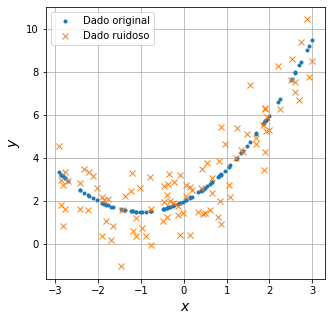

In [5]:
# Imprime a figura:
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, '.', label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.
plt.show()

In [6]:
# Definindo o fator de regularização
lambdas = np.linspace(1*10**-11, 1, 1000)

# Definindo se haverá ou não OFFSET 
include_bias = True

# Definindo o modelo do polinomio
model_order = 90

train_errors, val_errors, test_errors = [], [], []
minimum_val_error = float("inf")
best_epoch = None
best_model = None
best_lambda = None

for i in range(0,len(lambdas)):
    # Instantiate a polynomial with the given degree.
    poly_features = PolynomialFeatures(degree=model_order, include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a Ridge regressor.
    reg = Lasso(alpha=lambdas[i], tol=1, random_state=42) if lambdas[i] > 0 else LinearRegression()
    # Create a pipeline of actions.
    model = Pipeline([
        ("poly_features", poly_features),
        ("scaler", scaler),
        ("reg", reg),
    ])
    # Train model.
    model.fit(x_train, y_train)
    # Predict.
    y_train_predict = model.predict(x_train)
    y_val_predict = model.predict(x_val)
    y_test_predict = model.predict(x_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))
    
    if val_errors[i] < minimum_val_error:
        minimum_val_error = val_errors[i]
        best_epoch = i
        best_model = clone(model)
        best_lambda = lambdas[i]
        
print('best_epoch:',best_epoch)
print('best_lambda:',best_lambda)
print('minimum_val_error:',minimum_val_error)

best_epoch: 80
best_lambda: 0.08008008008927928
minimum_val_error: 1.2866955002319616


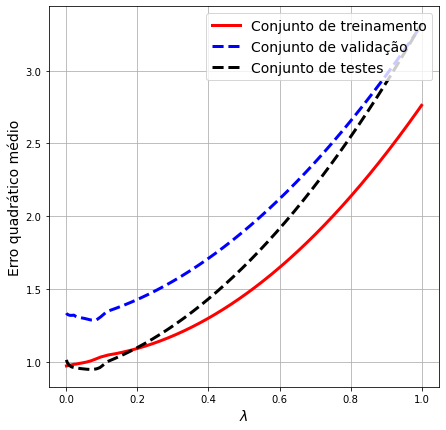

In [7]:
fig = plt.figure(figsize=(7,7))

plt.plot(lambdas, train_errors, "r-", linewidth=3, label="Conjunto de treinamento")
plt.plot(lambdas, val_errors, "b--", linewidth=3, label="Conjunto de validação")
plt.plot(lambdas, test_errors, "k--", linewidth=3, label="Conjunto de testes")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel("Erro quadrático médio", fontsize=14)
plt.grid()
plt.show()

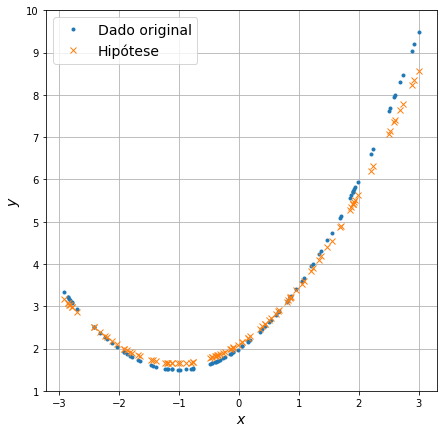

In [8]:
# Train model.
best_model.fit(x_train, y_train)

fig = plt.figure(figsize=(7,7))
plt.plot(x, y, '.', label='Dado original')
plt.plot(x, best_model.predict(x), 'x', label='Hipótese')
plt.ylim([1, 10])
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [9]:
train_errors, val_errors, test_errors = [], [], []
minimum_val_error = float("inf")
best_epoch = None
best_model = None
best_lambda = None

for i in range(0,len(lambdas)):
    # Instantiate a polynomial with the given degree.
    poly_features = PolynomialFeatures(degree=model_order, include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a Ridge regressor.
    reg = Ridge(alpha=lambdas[i], tol=1)
    # Create a pipeline of actions.
    model = Pipeline([
        ("poly_features", poly_features),
        ("scaler", scaler),
        ("reg", reg),
    ])
    # Train model.
    model.fit(x_train, y_train)
    # Predict.
    y_train_predict = model.predict(x_train)
    y_val_predict = model.predict(x_val)
    y_test_predict = model.predict(x_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))
    
    if val_errors[i] < minimum_val_error:
        minimum_val_error = val_errors[i]
        best_epoch = i
        best_model = clone(model)
        best_lambda = lambdas[i]
        
print('best_epoch:',best_epoch)
print('best_lambda:',best_lambda)
print('minimum_val_error:',minimum_val_error)

best_epoch: 999
best_lambda: 1.0
minimum_val_error: 1.8925258665245135


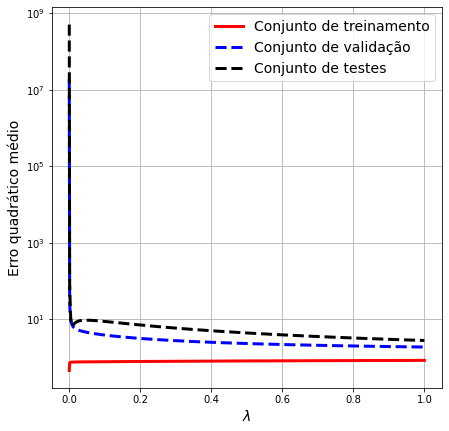

In [10]:
fig = plt.figure(figsize=(7,7))

plt.plot(lambdas, train_errors, "r-", linewidth=3, label="Conjunto de treinamento")
plt.plot(lambdas, val_errors, "b--", linewidth=3, label="Conjunto de validação")
plt.plot(lambdas, test_errors, "k--", linewidth=3, label="Conjunto de testes")
plt.legend(loc="upper right", fontsize=14)
plt.yscale('log')
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel("Erro quadrático médio", fontsize=14)
plt.grid()
plt.show()